## Imports

In [192]:
# scientific calculation and data analysis
import numpy as np
import pandas as pd
 
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# missingno
import missingno

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
## Model
from sklearn.naive_bayes import GaussianNB

# NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# WordCloud
from wordcloud import WordCloud

# basic imports
import string

## Load Data

In [154]:
train = pd.read_csv('../dataset/nlp-getting-started/train.csv')
test = pd.read_csv('../dataset/nlp-getting-started/test.csv')

In [67]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [68]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Data Cleaning

### Missing Value

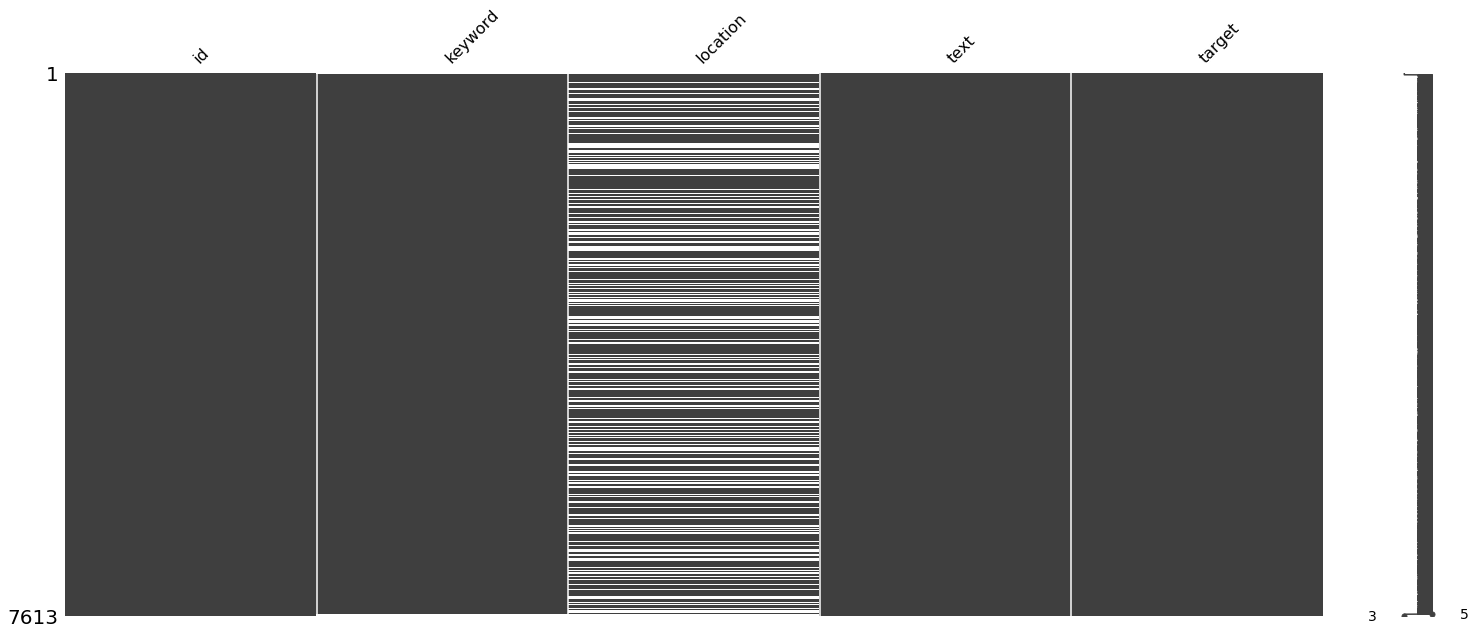

In [69]:
# train missing matrix
missingno.matrix(train)
plt.show()

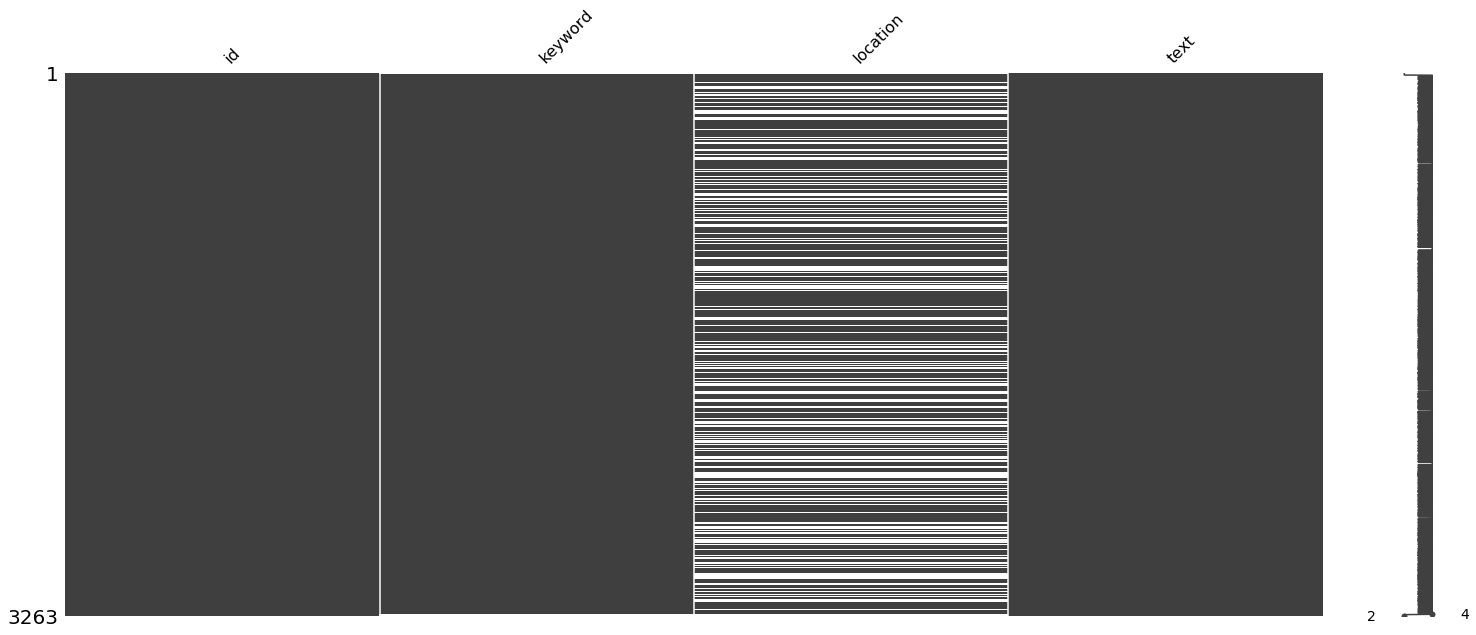

In [70]:
# test missing matrix
missingno.matrix(test)
plt.show()

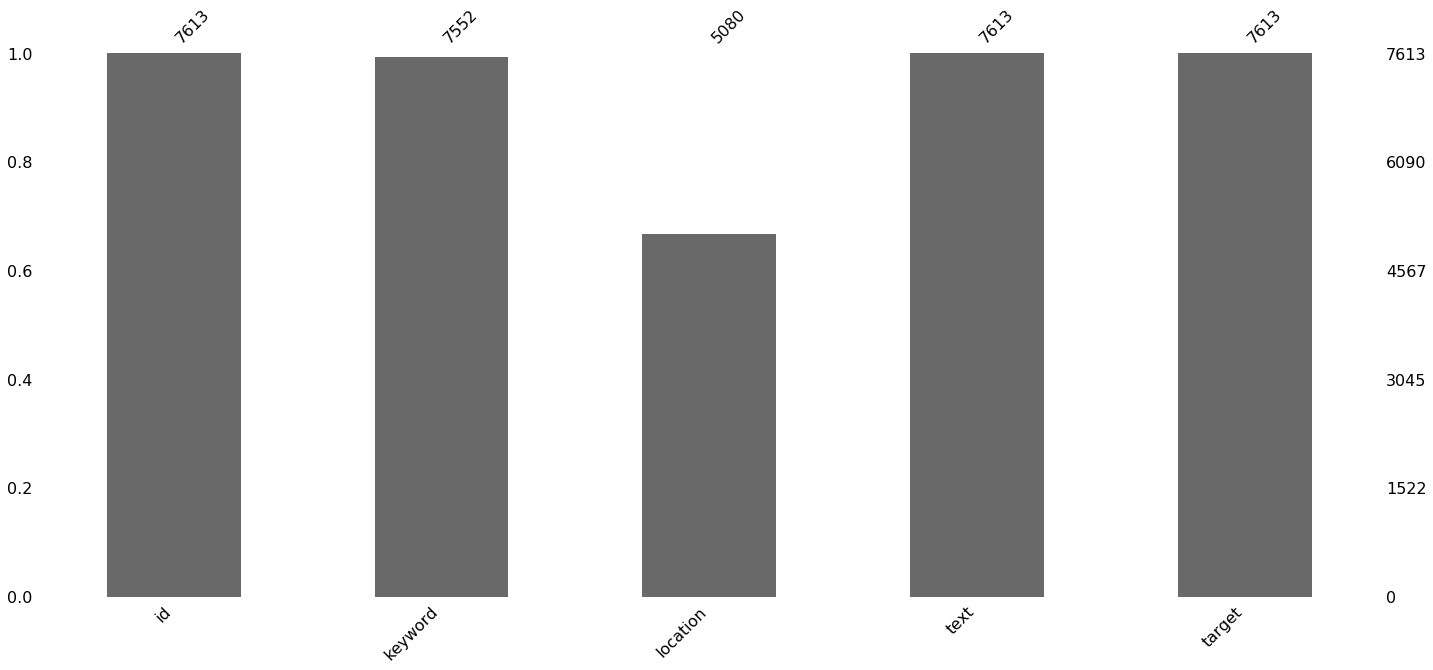

In [71]:
# missing bar plot train
missingno.bar(train)
plt.show()

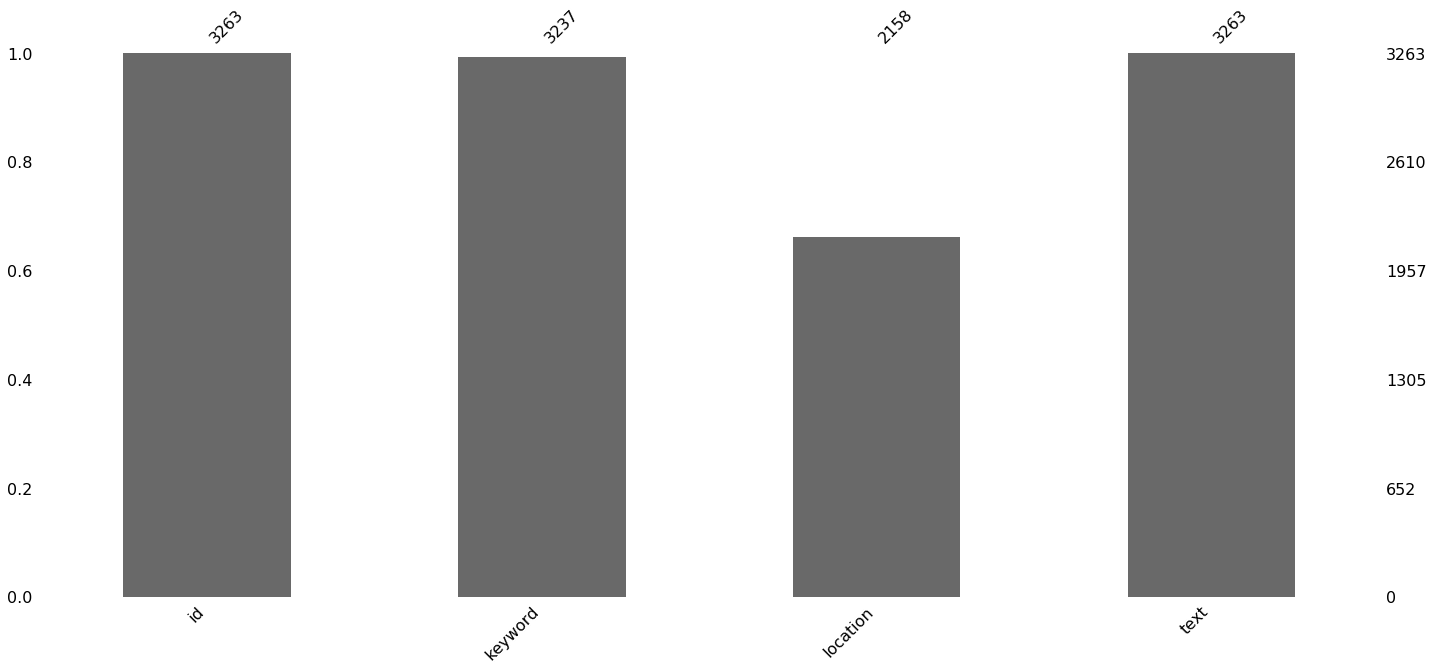

In [72]:
# missing bar plot test
missingno.bar(test)
plt.show()

In [155]:
# null count in train and test
null_vals = pd.DataFrame(columns=['train', 'test'])
null_vals['train'] = train.isnull().sum()
null_vals['test'] = test.isnull().sum()
null_vals

,train,test
id,0,0.0
keyword,61,26.0
location,2533,1105.0
text,0,0.0
target,0,NaN


 The output shows <b>location</b> has many null value and <b>keyword</b> are few.

In [156]:
# drop location features
train.drop('location', axis=1, inplace=True)

In [157]:
# drop nan rows
train.dropna(axis=0, inplace=True)

In [158]:
# check missing value in train dataset
train.isnull().sum()

id         0
keyword    0
text       0
target     0
dtype: int64

## Exploratory data analysis

Real/Fake tweets: Let's plot count plot and Pie plot

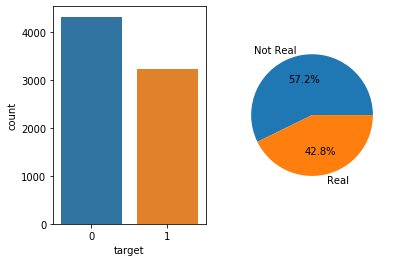

In [159]:
fig, ax = plt.subplots(1,2)
sns.countplot(x='target', data=train, ax=ax[0])
ax[1].pie(train.target.value_counts(), labels=['Not Real', 'Real'], autopct='%1.1f%%')
plt.show()

## Data Pre-processing

1. Remove punctuations
2. Lowercase and alphanumeric
3. Remove stopword

In [160]:
# create remove_punctuation functionabs
def remove_punctuations(text):
    return "".join([c for c in text if c not in string.punctuation])

In [161]:
# Apply to text feature
train['text'] = train['text'].apply(lambda x: remove_punctuations(x))

In [162]:
# create lower_apha_num: convert to lower case and remove numerucal value
def lower_alpha_num(text):
    return [word for word in word_tokenize(text.lower()) if word.isalpha()]

In [163]:
# Apply lower_apha_num
train['text'] = train['text'].apply(lambda x: lower_alpha_num(x))

In [164]:
def remove_stopword(text):
    return [w for w in text if w not in stopwords.words('english')]

In [165]:
train['text'] = train['text'].apply(lambda x: remove_stopword(x))

In [166]:
train.head()

,id,keyword,text,target
31,48,ablaze,"[bbcmtd, wholesale, markets, ablaze]",1
32,49,ablaze,"[always, try, bring, heavy, metal, rt]",0
33,50,ablaze,"[africanbaze, breaking, newsnigeria, flag, set...",1
34,52,ablaze,"[crying, set, ablaze]",0
35,53,ablaze,"[plus, side, look, sky, last, night, ablaze]",0


### Lemmatizing

In [167]:
# Initiate Lamitizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [168]:
train['text'] = train['text'].apply(lambda x: word_lemmatizer(x))

In [169]:
train.head()

,id,keyword,text,target
31,48,ablaze,bbcmtd wholesale market ablaze,1
32,49,ablaze,always try bring heavy metal rt,0
33,50,ablaze,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,cry set ablaze,0
35,53,ablaze,plus side look sky last night ablaze,0


In [170]:
X = train['text']
y = train['target']

### TFIDF

In [171]:
vectorizer_tfidf = TfidfVectorizer()

In [172]:
X = vectorizer_tfidf.fit_transform(X)

In [176]:
pd.DataFrame(X.A, columns=vectorizer_tfidf.get_feature_names()).head()

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aampb,aampw,aan,aannnnd,...,zurich,zxathetis,zzzz,åç,åè,åê,åêfedex,åêi,ìñ,ìü
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [186]:
X_train, X_val, y_train, y_val = train_test_split(X.A, y, test_size=0.3)

## Model

In [187]:
classifier = GaussianNB()

In [188]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [189]:
classifier.score(X_train, y_train)

0.9254634884600832

In [190]:
classifier.score(X_val, y_val)

0.5953221535745807